# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/dataset.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [1]:
import numpy as np

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
    
print(train[10])
print(len(train))
print(len(train[0]))
print(train.shape)

[1.3000e+01 8.0000e+00 7.0115e-01 1.4925e+00 3.4048e-01 9.8262e-01
 1.0000e+00 7.8473e-01 6.1511e-03 6.8862e-03 8.4050e-02 1.7102e-01
 2.8418e-02 8.7725e-03 5.2855e-04 1.7782e+00]
2244
16
(2244, 16)


### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [2]:
x = 0 
for i in range(1, 41):
    print(f'liczba probek w klasie {i} wynosi: {sum(train[:, 0] == i)}')
    x += sum(train[:,0] == i)
    
print(f'liczba wszystkich próbek wynosi {x}')

liczba probek w klasie 1 wynosi: 77
liczba probek w klasie 2 wynosi: 66
liczba probek w klasie 3 wynosi: 55
liczba probek w klasie 4 wynosi: 66
liczba probek w klasie 5 wynosi: 77
liczba probek w klasie 6 wynosi: 44
liczba probek w klasie 7 wynosi: 44
liczba probek w klasie 8 wynosi: 33
liczba probek w klasie 9 wynosi: 121
liczba probek w klasie 10 wynosi: 88
liczba probek w klasie 11 wynosi: 88
liczba probek w klasie 12 wynosi: 77
liczba probek w klasie 13 wynosi: 99
liczba probek w klasie 14 wynosi: 66
liczba probek w klasie 15 wynosi: 66
liczba probek w klasie 16 wynosi: 0
liczba probek w klasie 17 wynosi: 0
liczba probek w klasie 18 wynosi: 0
liczba probek w klasie 19 wynosi: 0
liczba probek w klasie 20 wynosi: 0
liczba probek w klasie 21 wynosi: 0
liczba probek w klasie 22 wynosi: 121
liczba probek w klasie 23 wynosi: 77
liczba probek w klasie 24 wynosi: 77
liczba probek w klasie 25 wynosi: 66
liczba probek w klasie 26 wynosi: 99
liczba probek w klasie 27 wynosi: 55
liczba probek 

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [3]:
import numpy as np

#np.isin
mask = np.isin(train[:,0], [3, 5])
# print(train[mask])

#1 sposób
train_new = train[(train[:, 0] == 3) | (train[:, 0] == 5)]
test_new = test[(test[:, 0] == 3) | (test[:, 0] == 5)]


### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje moduł zawieracjący funkcje przydatne do wizualizacji danych z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples): # iteracja po grupach
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
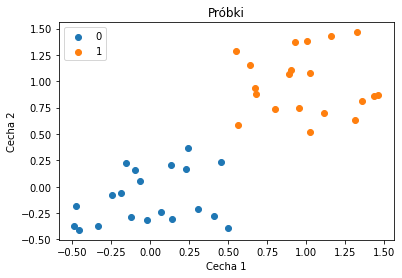

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

Text(0, 0.5, 'Cecha 8')

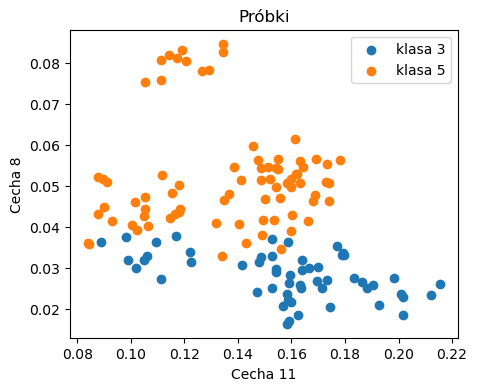

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))

klasy = [3, 5]
cechaX = 11
cechaY = 8

# train[np.isin(train[:,0], klasy)]
for kl in klasy: 
    klasa = train_new[train_new[:, 0] == kl]
    cecha_4 = klasa[:, cechaX]
    cecha_8 = klasa[:, cechaY]
    plt.scatter(cecha_4, cecha_8, label=f'klasa {kl}')

plt.title("Próbki")
plt.legend()
plt.xlabel(f"Cecha {cechaX}")
plt.ylabel(f"Cecha {cechaY}")


### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktami `x` i `y` uwzględniając wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$


In [5]:
features = [1, 2] # kolumny o indeksach 1, 2
x = [0, 2, 3]
y = [0, 5, 6]

def edist(x, y, features):
    return sum([(x[i]-y[i])**2 for i in features])**(1/2)

edist(x, y, features) # wynik: 4.242640687119285

4.242640687119285

### Zadanie 6  

Zaimplementuj klasyfikator **najbliższego sąsiada** (*k-Nearest Neighbor*).  

1. Oblicz odległość każdego elementu ze zbioru **testowego** do każdego elementu ze zbioru **treningowego**.  
2. Znajdź element ze zbioru **treningowego**, który znajduje się najbliżej klasyfikowanego elementu ze zbioru **testowego**.  
3. Przypisz klasyfikowanemu elementowi klasę najbliższego sąsiada.  


In [6]:
predictions = [] #lista z wynikami klasyfikatora 
features = list(range(2, 15))
# iterujemy po zbiorze testowym 
for el in test_new: 
    min_route = train_new[0]
    for l in train_new: 
        if edist(el, l, features) < edist(el, min_route, features):
            min_route = l
        
    print(str(el[0]) + ' -> ' + str(min_route[0]) + ' ' + str(edist(el, min_route, features)) + ' ' + str(min_route[0] == el[0]))
    predictions.append(min_route[0])
print(predictions)


    # obliczamy odległość elementu testowego el do każdego elementu zbioru treningowego (train_new) i wybieramy ten 
    # element którego odległość jest najmniejsza 
#     nearestN = train_new[] # element najbliższy ze zbioru train_new do el
    # etykiety umieszczamy na liście - odczytujemy etykiete elementu i przypisujemy próbce testowe (el)
#     predictions.append(nearestN[0])

3.0 -> 3.0 0.09703668842955436 True
3.0 -> 3.0 0.08770360449720183 True
5.0 -> 5.0 0.1089181780556584 True
5.0 -> 5.0 0.10378060421095371 True
5.0 -> 5.0 0.10600910353667758 True
3.0 -> 3.0 0.03919191772300001 True
3.0 -> 3.0 0.13744239394158206 True
5.0 -> 5.0 0.1322073832419962 True
5.0 -> 5.0 0.13644854435430967 True
3.0 -> 3.0 0.1689196672835202 True
3.0 -> 3.0 0.17940385138681875 True
3.0 -> 3.0 0.1008259586169365 True
5.0 -> 5.0 0.12388551638401984 True
5.0 -> 5.0 0.1943953153683823 True
5.0 -> 5.0 0.11206508717891912 True
3.0 -> 3.0 0.23332006786055842 True
3.0 -> 3.0 0.18468023316683166 True
5.0 -> 5.0 0.1110582995253785 True
5.0 -> 5.0 0.11478303772558575 True
3.0 -> 3.0 0.2263358457346329 True
3.0 -> 3.0 0.1368170537516289 True
3.0 -> 3.0 0.09173539191385226 True
5.0 -> 5.0 0.13994247469490123 True
5.0 -> 5.0 0.24756272481130986 True
5.0 -> 5.0 0.16909530323787936 True
3.0 -> 3.0 0.20987475676747694 True
3.0 -> 3.0 0.14919288661901012 True
5.0 -> 5.0 0.1770608196322531 True
5

### Zadanie 7
Przeprowadź klasyfikację liści dla wybranych wcześniej dwóch klas, korzystając z własnej implementacji modelu NN.

Następnie wyświetl wyniki klasyfikacji:
* Próbki treningowe i testowe.
* Każdą klasę oznacz innym kolorem.
* Próbki testowe wyróżnij innym markerem.

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

C:\Users\Lecrut\AppData\Local\Temp\ipykernel_22228\3958721045.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(point[0], point[1], c=colors.get(predictions[i], 'gray'), marker='+' if predictions[i] == 3.0 else 'x', edgecolors='black')
C:\Users\Lecrut\AppData\Local\Temp\ipykernel_22228\3958721045.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(point[0], point[1], c=colors.get(predictions[i], 'gray'), marker='+' if predictions[i] == 3.0 else 'x', edgecolors='black')


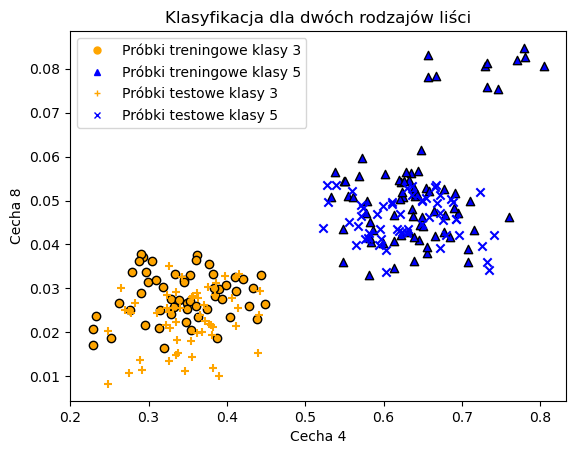

In [7]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd

def knn_predict(train_data, train_labels, test_data, features):
    predictions = [] 
    for el in test_data:  
        min_route = train_data[0]  
        min_label = train_labels[0]
        for idx, l in enumerate(train_data): 
            if edist(el, l, features) < edist(el, min_route, features):
                min_route = l
                min_label = train_labels[idx]  
        
        predictions.append(min_label) 
    return predictions

if isinstance(train_new, np.ndarray):
    train_new = pd.DataFrame(train_new)
if isinstance(test_new, np.ndarray):
    test_new = pd.DataFrame(test_new)

features = [4, 8]
    
x_train = train_new.iloc[:, features].values 
y_train = train_new.iloc[:, 0].values
x_test = test_new.iloc[:, features].values
y_test = test_new.iloc[:, 0].values

features = list(range(0, 2))

predictions = knn_predict(x_train, y_train, x_test, features)

colors = {3.0: 'orange', 5.0: 'blue'}
markers = {3.0: 'o', 5.0: '^'} 

for i, point in enumerate(x_train):
    plt.scatter(point[0], point[1], c=colors.get(y_train[i], 'gray'), marker=markers.get(y_train[i], 'x'), edgecolors='black')

for i, point in enumerate(x_test):
    plt.scatter(point[0], point[1], c=colors.get(predictions[i], 'gray'), marker='+' if predictions[i] == 3.0 else 'x', edgecolors='black')

plt.xlabel("Cecha 4")
plt.ylabel("Cecha 8")
plt.title("Klasyfikacja dla dwóch rodzajów liści")

train_handle_3 = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=5, label='Próbki treningowe klasy 3')
train_handle_5 = mlines.Line2D([], [], color='blue', marker='^', linestyle='None', markersize=5, label='Próbki treningowe klasy 5')
test_handle_3 = mlines.Line2D([], [], color='orange', marker='+', linestyle='None', markersize=5, label='Próbki testowe klasy 3')
test_handle_5 = mlines.Line2D([], [], color='blue', marker='x', linestyle='None', markersize=5, label='Próbki testowe klasy 5')

plt.legend(handles=[train_handle_3, train_handle_5, test_handle_3, test_handle_5], loc='upper left')
plt.show()


### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [8]:
def calculate_accuracy(predictions, y_test):
    return np.mean(predictions == y_test) * 100

print(f"Dokładność: {calculate_accuracy(predictions, y_test)}%")

Dokładność: 100.0%


### Zadanie 9

Do zbioru dodaj jeszcze **trzy** dowolne rodzaje liści (klasy) i przeprowadź eksperyment ponownie.

Łącznie zbiór będzie zawierał **pięć** klas. Wynik wciąż należy przedstawić dla tych samych dwóch cech co wcześniej.


C:\Users\Lecrut\AppData\Local\Temp\ipykernel_22228\818012652.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(point[0], point[1], c=colors.get(y_train[i], 'gray'), marker=markers.get(y_train[i], 'x'), edgecolors='black')
C:\Users\Lecrut\AppData\Local\Temp\ipykernel_22228\818012652.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(point[0], point[1], c=colors.get(predictions[i], 'gray'), marker=markers.get(predictions[i], 'x'), edgecolors='black')


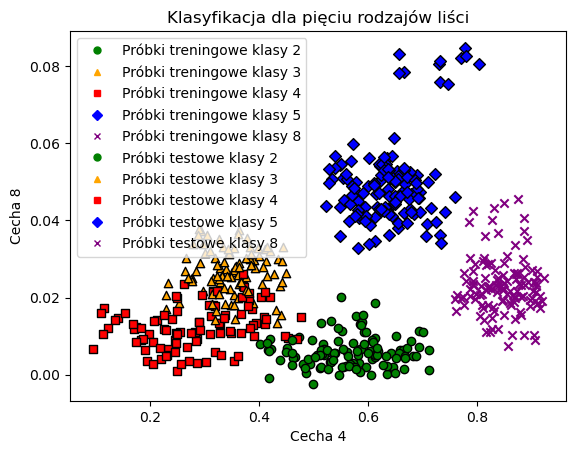

Dokładność: 90.53030303030303%


In [9]:
mask = np.isin(train[:,0], [2, 3, 4, 5, 8])
train_5 = train[mask]
mask = np.isin(test[:,0], [2, 3, 4, 5, 8])
test_5 = test[mask]

if isinstance(train_5, np.ndarray):
    train_5 = pd.DataFrame(train_5)
if isinstance(test_5, np.ndarray):
    test_5 = pd.DataFrame(test_5)

features = [4, 8]
x_train = train_5.iloc[:, features].values
y_train = train_5.iloc[:, 0].values
x_test = test_5.iloc[:, features].values
y_test = test_5.iloc[:, 0].values

features = list(range(0, 2)) 

predictions = knn_predict(x_train, y_train, x_test, features)

colors = {2.0: 'green', 3.0: 'orange', 4.0: 'red', 5.0: 'blue', 8.0: 'purple'}
markers = {2.0: 'o', 3.0: '^', 4.0: 's', 5.0: 'D', 8.0: 'x'}

for i, point in enumerate(x_train):
    plt.scatter(point[0], point[1], c=colors.get(y_train[i], 'gray'), marker=markers.get(y_train[i], 'x'), edgecolors='black')

for i, point in enumerate(x_test):
    plt.scatter(point[0], point[1], c=colors.get(predictions[i], 'gray'), marker=markers.get(predictions[i], 'x'), edgecolors='black')

plt.xlabel("Cecha 4")
plt.ylabel("Cecha 8")
plt.title("Klasyfikacja dla pięciu rodzajów liści")

train_handle_2 = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=5, label='Próbki treningowe klasy 2')
train_handle_3 = mlines.Line2D([], [], color='orange', marker='^', linestyle='None', markersize=5, label='Próbki treningowe klasy 3')
train_handle_4 = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markersize=5, label='Próbki treningowe klasy 4')
train_handle_5 = mlines.Line2D([], [], color='blue', marker='D', linestyle='None', markersize=5, label='Próbki treningowe klasy 5')
train_handle_8 = mlines.Line2D([], [], color='purple', marker='x', linestyle='None', markersize=5, label='Próbki treningowe klasy 8')

test_handle_2 = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=5, label='Próbki testowe klasy 2')
test_handle_3 = mlines.Line2D([], [], color='orange', marker='^', linestyle='None', markersize=5, label='Próbki testowe klasy 3')
test_handle_4 = mlines.Line2D([], [], color='red', marker='s', linestyle='None', markersize=5, label='Próbki testowe klasy 4')
test_handle_5 = mlines.Line2D([], [], color='blue', marker='D', linestyle='None', markersize=5, label='Próbki testowe klasy 5')
test_handle_8 = mlines.Line2D([], [], color='purple', marker='x', linestyle='None', markersize=5, label='Próbki testowe klasy 8')

plt.legend(handles=[train_handle_2, train_handle_3, train_handle_4, train_handle_5, train_handle_8, 
                   test_handle_2, test_handle_3, test_handle_4, test_handle_5, test_handle_8], loc='upper left')

plt.show()
    
print(f"Dokładność: {calculate_accuracy(predictions, y_test)}%")

### Zadanie 10

Przeprowadź eksperyment ponownie, używając tych samych parametrów co w zadaniu 9, ale z większą liczbą cech: 3, 5 i 10.

> W tym przypadku nie wyświetlaj wykresu - oblicz jedynie dokładność klasyfikacji.
> Zwiększając liczbę cech, dodawaj nowe cechy, zachowując wcześniejsze.

In [11]:
features = [[4, 5, 7, 8, 10, 3, 9, 6, 11, 12], [4, 5, 7, 8, 10], [4, 5, 7]]
for i in range(len(features)):
    x_train = train_5.iloc[:, :].values
    y_train = train_5.iloc[:, 0].values
    x_test = test_5.iloc[:, :].values
    y_test = test_5.iloc[:, 0].values
    
    predictions = knn_predict(x_train, y_train, x_test, features[i])

    print(f"Dokładność dla {len(features[i])} cech: {calculate_accuracy(predictions, y_test)}%") 


Dokładność dla 10 cech: 91.28787878787878%
Dokładność dla 5 cech: 87.12121212121212%
Dokładność dla 3 cech: 83.33333333333334%


### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

- W zależności od zastosowanych cech, wyniki klasyfikacji mogą różnić się w zależności od gatunków roślin.

- Wysoka dokładność klasyfikacji w przypadku dobrze zróżnicowanych gatunków może być efektem ich wyraźnych różnic w cechach.

- Wyniki klasyfikacji wskazują, że klasy liści o podobnych cechach geometrycznych mogą być trudne do odróżnienia.

- Wysoka skuteczność klasyfikacji może być uzyskana dzięki dobrze wybranym cechom liści, jak kształt czy wielkość.

